In [233]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date 

# today() to get current date
todays_date = date.today()

print("Today's date =", todays_date)

# Loading time series tide data into a Pandas Data Frame 
data = pd.read_csv("Cochin_ENC_2016_hourly.csv", parse_dates=True)
data.columns = ['Date_and_Time', 'Tide']
data['Date_and_Time'] = pd.to_datetime(data['Date_and_Time'], format = "%m-%d-%Y %H:%M")
data = data.sort_values(by = "Date_and_Time")


Today's date = 2023-06-28


In [234]:
data.head()

,Date_and_Time,Tide
95,2016-01-01 00:00:00,1.024
96,2016-01-01 01:00:00,1.030
97,2016-01-01 02:00:00,1.005
98,2016-01-01 03:00:00,0.899
99,2016-01-01 04:00:00,0.775


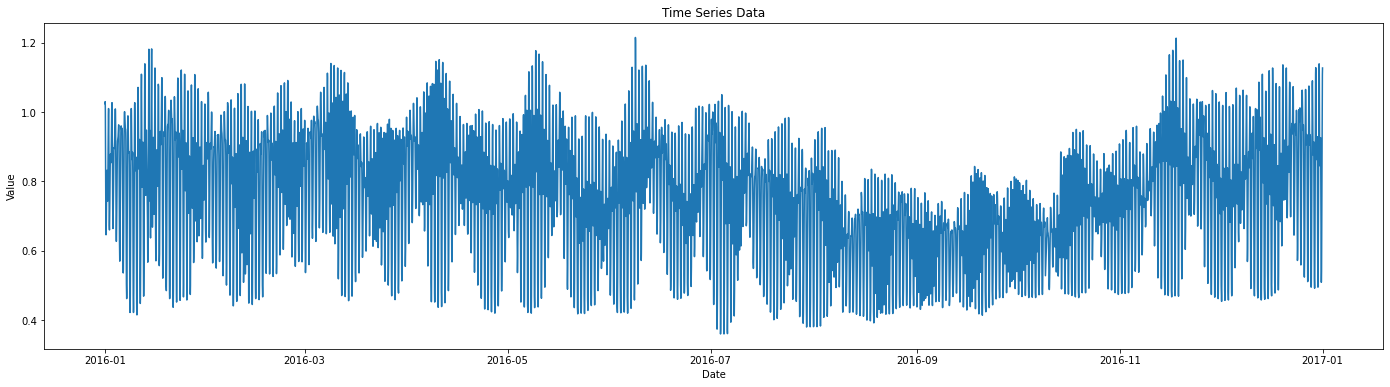

In [235]:
# Plot the time series data
plt.figure(figsize=(24,6))
plt.plot(data['Date_and_Time'],data['Tide'])
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

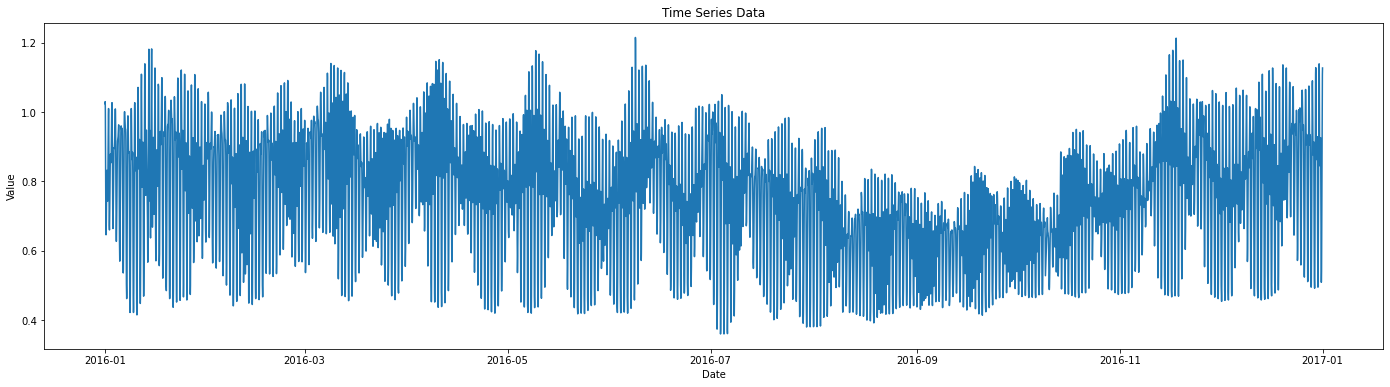

In [236]:
x = data.xs('Date_and_Time', axis = 1)
y = data.Tide
plt.figure(figsize=(24,6))
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.plot(x, y)
plt.show()

In [237]:
data



,Date_and_Time,Tide
95,2016-01-01 00:00:00,1.024
96,2016-01-01 01:00:00,1.030
97,2016-01-01 02:00:00,1.005
98,2016-01-01 03:00:00,0.899
99,2016-01-01 04:00:00,0.775
...,...,...
8414,2016-12-31 19:00:00,0.837
8415,2016-12-31 20:00:00,0.946
8416,2016-12-31 21:00:00,1.043
8417,2016-12-31 22:00:00,1.108


In [263]:
'''

# Resample the time series data to a lower frequency
daily_data = data.resample('D', on = "Date_and_Time").mean()
weekly_data = data.resample('W', on = "Date_and_Time").mean()


#Plot the resampled data
plt.figure(figsize=(24,6))
fig, axs = plt.subplots(2)
axs[0].plot(daily_data)
axs[1].plot(weekly_data)
#plt.title('Daily Resampled Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

'''

'\n\n# Resample the time series data to a lower frequency\ndaily_data = data.resample(\'D\', on = "Date_and_Time").mean()\nweekly_data = data.resample(\'W\', on = "Date_and_Time").mean()\n\n\n#Plot the resampled data\nplt.figure(figsize=(24,6))\nfig, axs = plt.subplots(2)\naxs[0].plot(daily_data)\naxs[1].plot(weekly_data)\n#plt.title(\'Daily Resampled Data\')\nplt.xlabel(\'Date\')\nplt.ylabel(\'Value\')\nplt.show()\n\n'

C:\Users\incois\AppData\Local\Temp\ipykernel_22256\2406200516.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date_and_Time'], dtype='object')
  rolling_data = data.rolling(window=25).mean()


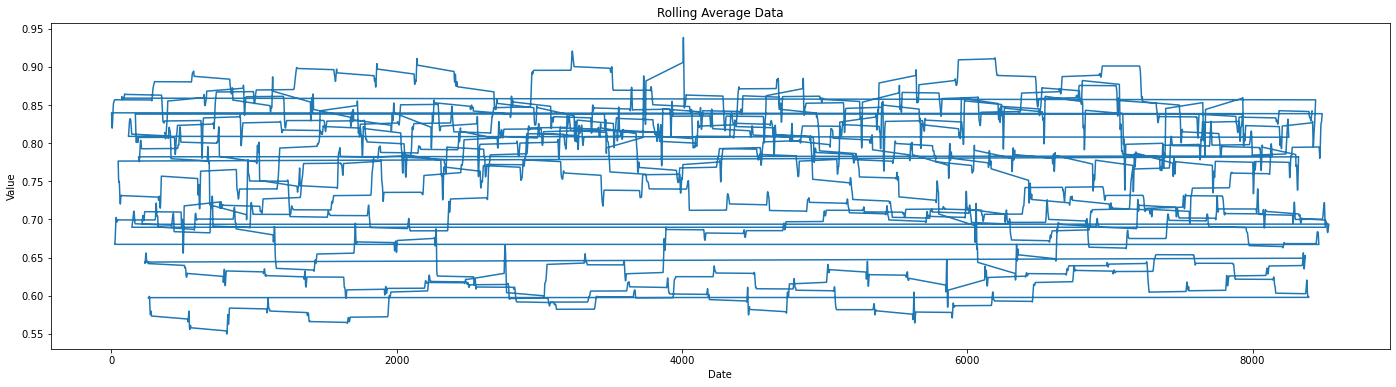

In [282]:
# Perform a rolling average on the time series data
rolling_data = data.rolling(window=25).mean()

# Plot the rolling average data
plt.figure(figsize=(24,6))
plt.plot(rolling_data)
plt.title('Rolling Average Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [283]:
data.set_index('Date_and_Time')

,Tide
Date_and_Time,
2016-01-01 00:00:00,1.024
2016-01-01 01:00:00,1.030
2016-01-01 02:00:00,1.005
2016-01-01 03:00:00,0.899
2016-01-01 04:00:00,0.775
...,...
2016-12-31 19:00:00,0.837
2016-12-31 20:00:00,0.946
2016-12-31 21:00:00,1.043


In [281]:
# Perform a time series decomposition on the data
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data, model='additive')

# Plot the decomposition
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(data, label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading time series data into a Pandas DataFrame
data = pd.read_csv('time_series_data.csv', index_col=0, parse_dates=True)

# Plot the time series data
plt.plot(data)
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Resample the time series data to a lower frequency
weekly_data = data.resample('D').mean()

# Plot the resampled data
plt.plot(weekly_data)
plt.title('Weekly Resampled Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Perform a rolling average on the time series data
rolling_data = data.rolling(window=30).mean()

# Plot the rolling average data
plt.plot(rolling_data)
plt.title('Rolling Average Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Perform a time series decomposition on the data
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data)

# Plot the decomposition
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(data, label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()
